In [37]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
os.chdir("c:/Users/Jacob/Nonlinearity/Data/misc/")
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16

In [38]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
keys = [i[:-len(extension)-1] for i in all_filenames]
print(keys)

['parallel-data', 'parallel_timedelay_clean', 'parallel_timedelay_raw', 'parallel_transdelays', 'perpendicular-data', 'perpendicular_timedelay_clean', 'perpendicular_timedelay_raw', 'perpendicular_transdelays']


In [39]:
combined_csv = pd.concat([pd.read_csv(f, header=None) for f in all_filenames ], keys=keys, axis=1)

df1 = combined_csv[['parallel_transdelays', 'parallel_timedelay_raw', 'parallel_timedelay_clean']]
df2 = combined_csv[['perpendicular_transdelays', 'perpendicular_timedelay_raw', 'perpendicular_timedelay_clean']]
df1.to_csv( "parallel-data.csv", index=False, encoding='utf-8-sig')
df2.to_csv( "perpendicular-data.csv", index=False, encoding='utf-8-sig')

In [40]:
df3 = df1.join(df2)

In [41]:
df3

,parallel_transdelays,parallel_timedelay_raw,parallel_timedelay_clean,perpendicular_transdelays,perpendicular_timedelay_raw,perpendicular_timedelay_clean
,0,0,0,0,0,0
0,0.0,3.542769,3.542769,0.0,0.249532,0.249532
1,1.0,4.654116,4.654116,1.0,0.737553,0.737553
2,2.0,4.933062,4.933062,2.0,1.560676,1.560676
3,3.0,5.428486,5.428486,3.0,1.600292,1.600292
4,4.0,5.973368,5.973368,4.0,2.015176,2.015176
...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN


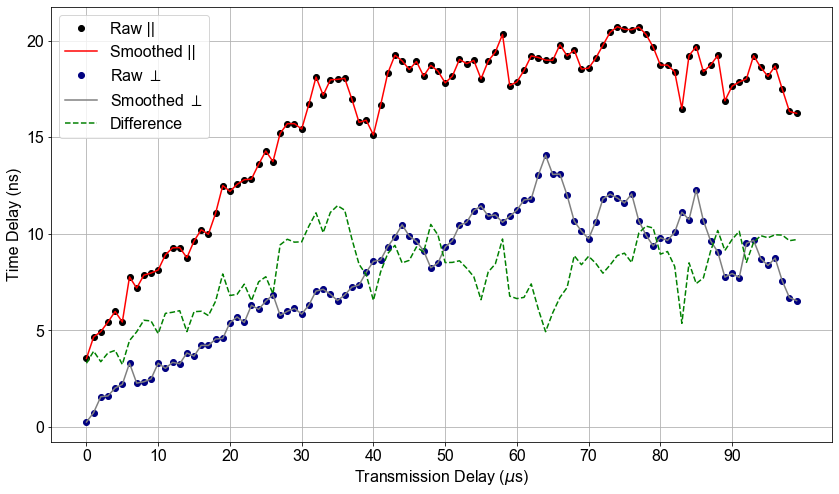

In [52]:
plt.figure(figsize = (14,8))

plt.plot(df3['parallel_transdelays'],df3['parallel_timedelay_raw'],'co', label = 'Raw ||', color = 'black')
plt.plot(df3['parallel_transdelays'],df3['parallel_timedelay_clean'],'c', label = 'Smoothed ||', color = 'r')

plt.plot(df3['perpendicular_transdelays'],df3['perpendicular_timedelay_raw'],'co', label = 'Raw $\perp$', color = 'navy')
plt.plot(df3['perpendicular_transdelays'],df3['perpendicular_timedelay_clean'],'c', label = 'Smoothed $\perp$', color = 'grey')

plt.plot(df3['perpendicular_transdelays'],abs(df3['perpendicular_timedelay_clean']-df3['parallel_timedelay_clean']),'--', 
         label = 'Difference', color = 'green')

plt.xlabel('Transmission Delay ($\mu$s)',fontsize=16)
plt.xticks(np.arange(0,100,10))
plt.ylabel('Time Delay (ns)',fontsize=16)
plt.savefig('PD_difference.PNG', pad_inches=0.1, bbox_inches='tight')
plt.grid()
plt.legend(fontsize=16)
plt.savefig('../../Images/Set-up/para-perp-difference.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()

In [45]:
percent_dif = (df3['parallel_timedelay_raw']-df3['perpendicular_timedelay_raw'])/df3['perpendicular_timedelay_raw']*100

In [46]:
df3['parallel_timedelay_raw']

,0
0,3.542769
1,4.654116
2,4.933062
3,5.428486
4,5.973368
...,...
101,NaN
102,NaN
103,NaN
104,NaN


In [47]:
df3['perpendicular_timedelay_raw']

,0
0,0.249532
1,0.737553
2,1.560676
3,1.600292
4,2.015176
...,...
101,NaN
102,NaN
103,NaN
104,NaN


In [48]:
print(percent_dif)

               0
0    1319.767532
1     531.021112
2     216.084931
3     239.218554
4     196.419164
..           ...
101          NaN
102          NaN
103          NaN
104          NaN
105          NaN

[106 rows x 1 columns]


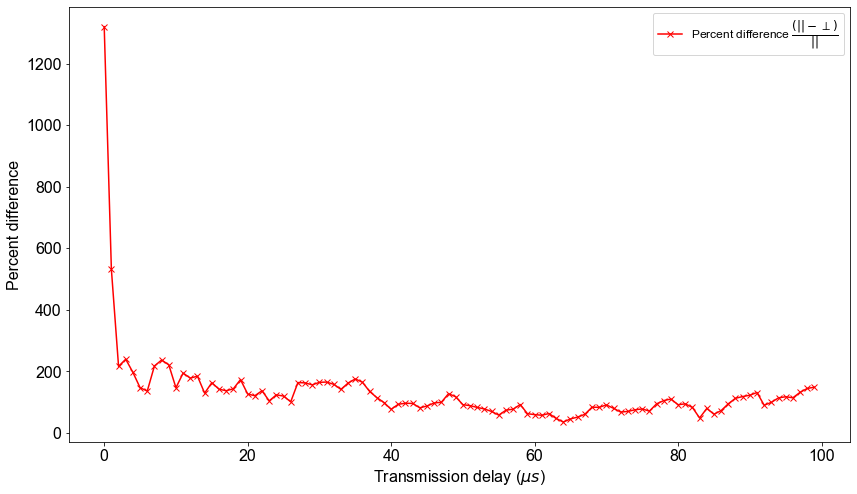

In [49]:
plt.figure(figsize = (14,8))
plt.plot(df3['parallel_transdelays'], percent_dif, 'rx-', label='Percent difference $\dfrac{(|| - \perp)}{||}$')
plt.xlabel('Transmission delay ($\mu s$)',fontsize=16)
plt.ylabel('Percent difference',fontsize=16)
plt.legend(fontsize=12)

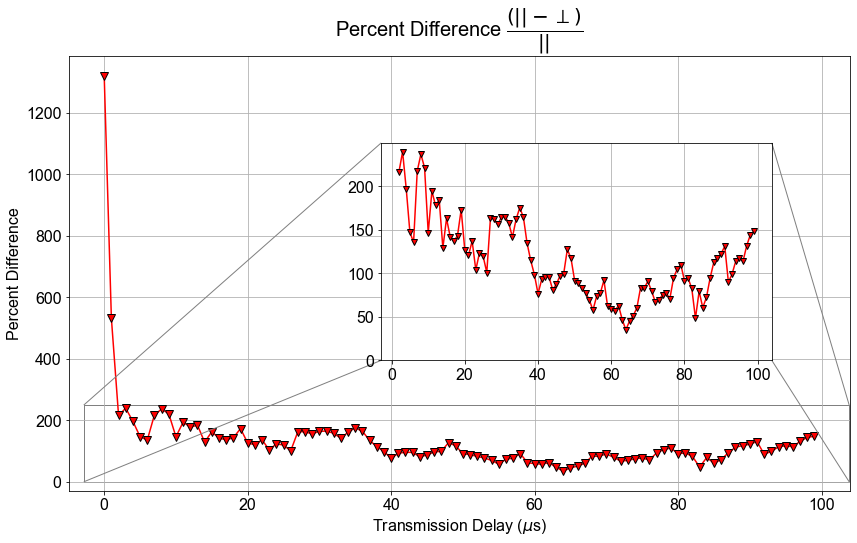

In [53]:
fig, ax1 = plt.subplots(figsize = (14,8))

# The data.
ax1.plot(df3['parallel_transdelays'], percent_dif, 'rv-', markersize=8, markeredgecolor='k')


ax1.set_xlabel('Transmission Delay ($\mu$s)',fontsize=16)
ax1.set_ylabel('Percent Difference',fontsize=16)
ax1.set_title('Percent Difference $\dfrac{(|| - \perp)}{||}$', fontsize=20)
ax1.grid()
# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.4,0.3,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
mark_inset(ax1, ax2, loc1=1, loc2=3, fc="none", ec='0.5')
# The data: only display for low temperature in the inset figure.
ax2.plot(df3['parallel_transdelays'][2:], percent_dif[2:], 'rv-', markeredgecolor='k')


ax2.set_yticks(np.arange(0,250,50))
ax2.grid()
plt.savefig('../../Images/Set-up/para-perp-percent-difference2.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()